<a href="https://colab.research.google.com/github/YunusKaratepe/duygu-tanima/blob/main/ClassificationReport_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import librosa
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.layers import Dense,GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras import activations

import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

import re
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import seaborn as sn

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
def getDataset(seed): 
  directory = '/content/drive/My Drive/Bp_dataset_v4/MelSpectrogram_128/MelSpectrogramOriginal_Mel128'

  train_set=tf.keras.preprocessing.image_dataset_from_directory(
      directory,
      labels="inferred",
      label_mode="categorical",
      subset="training",
      class_names=None,
      shuffle=True,
      seed = seed, #10 50 100 verecegiz 
      batch_size=32,
      image_size=(128, 128),
      validation_split = 0.2,
      #interpolation="lanczos5"
  )

  test_set = tf.keras.preprocessing.image_dataset_from_directory(
      directory,
      labels="inferred",
      label_mode="categorical",
      subset="validation",
      validation_split = 0.2,
      class_names=None,
      shuffle=True,
      seed = seed, #10 50 100 verecegiz
      batch_size=32,
      image_size=(128, 128),
      #interpolation="lanczos5"
  )
  
  #print(test_set)
  #for data, labels in test_set:
    #print(data.shape)  # (64, 200, 200, 3)
  return train_set, test_set

Found 1441 files belonging to 8 classes.
Using 1153 files for training.
Found 1441 files belonging to 8 classes.
Using 288 files for validation.


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[1.1967933e-02 2.8951446e-05 2.5185464e-02 ... 6.9910407e-02
  6.6795032e-03 2.3154798e-03]
 [2.5381628e-02 1.6988262e-04 7.7534735e-01 ... 2.4184968e-02
  2.3366017e-02 7.1405659e-05]
 [3.0124107e-01 1.9406326e-03 6.3707280e-01 ... 3.2059994e-02
  1.0063146e-03 7.4270866e-03]
 ...
 [3.2855821e-04 9.9965501e-01 5.4895727e-06 ... 2.7841536e-06
  3.5451894e-06 1.0164865e-07]
 [8.3339831e-04 1.7486504e-04 7.4632175e-02 ... 4.2062630e-03
  9.0190553e-04 5.5939844e-03]
 [3.2572102e-04 4.3492510e-05 3.5128690e-02 ... 1.1275925e-04
  9.9771410e-02 6.9454259e-01]]
1. Matris: 
[[19  1  2  0  0  0  0  0]
 [ 1 31  0  1  0  0  1  0]
 [ 1  0 25  7  3  2  0  6]
 [ 0  8  8 15  1  4  7  0]
 [ 0  2  4  0 29  0  1  2]
 [ 0  0  1  6  2 23  1  0]
 [ 2  2  2  1  0  0 31  0]
 [ 0  0  2  0  3  2  4 25]]
------------------------------
Found 1441 files belonging to 8 classes.
Using 1153 files for training.
Found 1441 files belonging to 8 classes.
Using 288 files for validation.
[[2.08839061e-04 1.70032319e-03

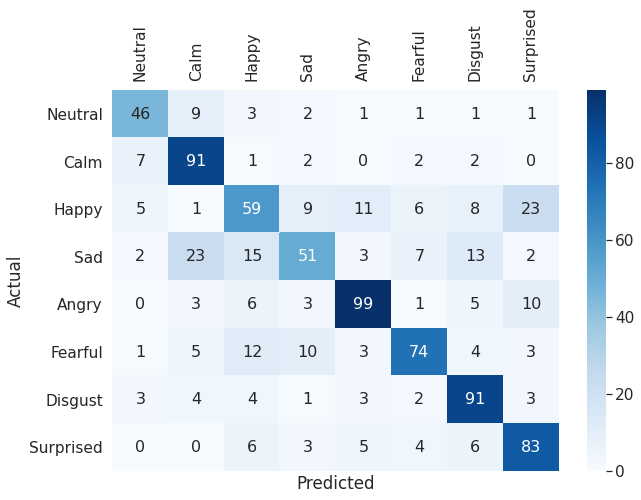

Acc: 0.6875
---------------------------------------------

Classification Report

              precision    recall  f1-score   support

     Neutral       0.72      0.72      0.72        64
        Calm       0.67      0.87      0.76       105
       Happy       0.56      0.48      0.52       122
         Sad       0.63      0.44      0.52       116
       Angry       0.79      0.78      0.79       127
     Fearful       0.76      0.66      0.71       112
     Disgust       0.70      0.82      0.76       111
   Surprised       0.66      0.78      0.72       107

    accuracy                           0.69       864
   macro avg       0.69      0.69      0.68       864
weighted avg       0.69      0.69      0.68       864



In [27]:
import sklearn.metrics as metrics

sentimentClasses = ['Neutral', 'Calm', 'Happy', 'Sad', 'Angry', 'Fearful', 'Disgust', 'Surprised']


newConfMat = []
for i in range(8):
  newConfMat.append([0, 0, 0, 0, 0, 0, 0, 0])


for i in range(3):
  cnnPath = ""
  if i == 0:
    cnnPath = '/content/drive/My Drive/Bp_Models/MelSpectrogramOriginal_Mel128_v1' #seed = 10
    _, test_set = getDataset(10)
  elif i==1: 
    cnnPath = '/content/drive/My Drive/Bp_Models/MelSpectrogramOriginal_Mel128_v2'  #Seed = 50
    _, test_set = getDataset(50)
  else:
    cnnPath = '/content/drive/My Drive/Bp_Models/MelSpectrogramOriginal_Mel128_v3' #Seed= 100
    _, test_set = getDataset(100)
 
  model = keras.models.load_model(cnnPath)


  predictions = np.array([])
  labels =  np.array([])
  for x, y in test_set:
      predictions = np.concatenate([predictions, model.predict_classes(x)])
      labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

  result = model.predict(test_set)
  print(result)


  confusion_mat = metrics.confusion_matrix(labels, predictions)
  print(str(i+1) + ". Matris: ")
  print(confusion_mat)
  print("------------------------------")

  newConfMat = np.add(confusion_mat, newConfMat)


print("Toplanmış matris: ")
print(newConfMat)



df_cm = pd.DataFrame(newConfMat, columns=sentimentClasses, index = sentimentClasses)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
    
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True, fmt='g', annot_kws={"size": 16})# font size
plt.show()



yPred = []
yTrue = []

for i in range(8):
  for j in range(8):

    for k in range(newConfMat[i][j]):
      yTrue.append(i + 1)

for i in range(8):
  for j in range(8):
    for k in range(newConfMat[i][j]):
      yPred.append(j + 1)




print("Acc:", metrics.accuracy_score(yTrue, yPred))
print("---------------------------------------------")
print('\nClassification Report\n')
report = classification_report(yTrue, yPred, target_names = sentimentClasses)
print(report)




